In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# # You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.metrics import fbeta_score, make_scorer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import hamming_loss
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import zero_one_loss
from sklearn.metrics import brier_score_loss
from sklearn.metrics import balanced_accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv("train_values.csv")

In [ ]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

> #  Description
* > geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
* > count_floors_pre_eq (type: int): number of floors in the building before the earthquake.
* > age (type: int): age of the building in years.
* > area_percentage (type: int): normalized area of the building footprint.
* > height_percentage (type: int): normalized height of the building footprint.
* > land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
* > foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
* > roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.
* > ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
* > other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
* > position (type: categorical): position of the building. Possible values: j, o, s, t.
* > plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
* > has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
* > has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
*  > has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.
*   > has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
*   > has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
*   > has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
*   > has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.
*   > has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
*   > has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
*   > has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
*   > has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.
*   > legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
*   > count_families (type: int): number of families that live in the building.
*   > has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.
*   > has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.
*   > has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.
*   > has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.
*   > has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.
*   > has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.
*   > has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.
*   > has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.
*   > has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.
*   > has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.
*   > has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.

In [ ]:
df.shape

(260601, 39)

In [ ]:
df2 = pd.read_csv("train_labels.csv")

In [ ]:
df2.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [ ]:
df2.shape

(260601, 2)

In [ ]:
# df['damage_grade'] = df2['damage_grade']
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# plt.figure(figsize=(10,10))
# cor=df.corr()["damage_grade"]
# cor=pd.DataFrame(cor)
# sns.heatmap(cor,annot=True,cmap="viridis")

In [ ]:
# exploring the statstical fearures of train dataset.
df.describe().T.style.background_gradient(cmap='Set2',low =0.4,high=0.1,axis=0)

,count,mean,std,min,25%,50%,75%,max
building_id,260601.000000,525675.482773,304544.999032,4.000000,261190.000000,525757.000000,789762.000000,1052934.000000
geo_level_1_id,260601.000000,13.900353,8.033617,0.000000,7.000000,12.000000,21.000000,30.000000
geo_level_2_id,260601.000000,701.074685,412.710734,0.000000,350.000000,702.000000,1050.000000,1427.000000
geo_level_3_id,260601.000000,6257.876148,3646.369645,0.000000,3073.000000,6270.000000,9412.000000,12567.000000
count_floors_pre_eq,260601.000000,2.129723,0.727665,1.000000,2.000000,2.000000,2.000000,9.000000
age,260601.000000,26.535029,73.565937,0.000000,10.000000,15.000000,30.000000,995.000000
area_percentage,260601.000000,8.018051,4.392231,1.000000,5.000000,7.000000,9.000000,100.000000
height_percentage,260601.000000,5.434365,1.918418,2.000000,4.000000,5.000000,6.000000,32.000000
has_superstructure_adobe_mud,260601.000000,0.088645,0.284231,0.000000,0.000000,0.000000,0.000000,1.000000
has_superstructure_mud_mortar_stone,260601.000000,0.761935,0.425900,0.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe(include="object").T.style.background_gradient(cmap='Set2',axis=0)


,count,unique,top,freq
land_surface_condition,260601,3,t,216757
foundation_type,260601,5,r,219196
roof_type,260601,3,n,182842
ground_floor_type,260601,5,f,209619
other_floor_type,260601,4,q,165282
position,260601,4,s,202090
plan_configuration,260601,10,d,250072
legal_ownership_status,260601,4,v,250939


In [ ]:
# checking the types of varibles in the dataset(int,float,object)
dtypes=pd.DataFrame(df.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=df.nunique()
dtypes["Null Values"]=df.isnull().sum()
dtypes["% null Values"]=df.isnull().sum()/len(df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
building_id,int64,260601,0,0.000000
geo_level_1_id,int64,31,0,0.000000
geo_level_2_id,int64,1414,0,0.000000
geo_level_3_id,int64,11595,0,0.000000
count_floors_pre_eq,int64,9,0,0.000000
age,int64,42,0,0.000000
area_percentage,int64,84,0,0.000000
height_percentage,int64,27,0,0.000000
land_surface_condition,object,3,0,0.000000
foundation_type,object,5,0,0.000000


> We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage
> 
1. > 1: represents low damage
2. > 2: represents a medium amount of damage
3. > 3:
represents almost complete destruction

In [ ]:
df2[df2['damage_grade']==1] = "Low_Damage"
df2[df2['damage_grade']==2] = "Medium_Damage"
df2[df2['damage_grade']==3] = "High_Damage"

In [ ]:
y = df2['damage_grade']
y

0           High_Damage
1         Medium_Damage
2           High_Damage
3         Medium_Damage
4           High_Damage
              ...      
260596    Medium_Damage
260597      High_Damage
260598      High_Damage
260599    Medium_Damage
260600      High_Damage
Name: damage_grade, Length: 260601, dtype: object

In [ ]:
y.unique()

array(['High_Damage', 'Medium_Damage', 'Low_Damage'], dtype=object)

In [ ]:
y.value_counts()

Medium_Damage    148259
High_Damage       87218
Low_Damage        25124
Name: damage_grade, dtype: int64

In [ ]:
df.isna().any()

building_id                               False
geo_level_1_id                            False
geo_level_2_id                            False
geo_level_3_id                            False
count_floors_pre_eq                       False
age                                       False
area_percentage                           False
height_percentage                         False
land_surface_condition                    False
foundation_type                           False
roof_type                                 False
ground_floor_type                         False
other_floor_type                          False
position                                  False
plan_configuration                        False
has_superstructure_adobe_mud              False
has_superstructure_mud_mortar_stone       False
has_superstructure_stone_flag             False
has_superstructure_cement_mortar_stone    False
has_superstructure_mud_mortar_brick       False
has_superstructure_cement_mortar_brick  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [ ]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df["has_secondary_use_hotel"].unique()
df["has_secondary_use_other"].unique()


array([0, 1])

In [ ]:
col = df.columns
col = df[['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']]

In [ ]:
for i in col:
    print (df[i].unique())

[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
['v' 'a' 'r' 'w']
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [ ]:

df[['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']] = df[['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [ ]:


l0 = df['building_id'].unique()
l1 = df['geo_level_1_id'].unique()
l2 = df['geo_level_2_id'].unique()
l3 = df['geo_level_3_id'].unique()

In [ ]:
len(l1)
len(l2)
len(l3)
len(l0)#all unique

260601

In [ ]:
df1 = df[['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 35 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   count_floors_pre_eq                     260601 non-null  int64 
 1   age                                     260601 non-null  int64 
 2   area_percentage                         260601 non-null  int64 
 3   height_percentage                       260601 non-null  int64 
 4   land_surface_condition                  260601 non-null  object
 5   foundation_type                         260601 non-null  object
 6   roof_type                               260601 non-null  object
 7   ground_floor_type                       260601 non-null  object
 8   other_floor_type                        260601 non-null  object
 9   position                                260601 non-null  object
 10  plan_configuration                      260601 non-null 

In [ ]:
df3 = pd.read_csv("test_values.csv")
df4 = pd.DataFrame()
df4 = df3[['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']]

In [ ]:
df.shape

(260601, 39)

In [ ]:
df4.shape

(86868, 35)

In [ ]:
X1 = pd.DataFrame(df1)
X1=X1.append(df4)
X1.shape

(347469, 35)

In [ ]:
X1 = pd.get_dummies(X1,drop_first=True)

> # GENERATE MODEL REPORT

In [ ]:


def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted,average="micro"))
    print("Recall = " ,recall_score(y_actual, y_predicted,average="micro"))
    print("F1 Score = " ,f1_score(y_actual, y_predicted,average="micro"))
    print("Cohen Kappa score= ",cohen_kappa_score(y_actual,y_predicted))
    print("Hamming Loss = ",hamming_loss(y_actual,y_predicted))
    print("Jaccard Score = ",jaccard_score(y_actual, y_predicted,average="micro"))
#     print("Log Loss = ",log_loss(y_actual, y_predicted))
    print("Matthews correlation coefficient = ", matthews_corrcoef(y_actual, y_predicted))
    print("Zero one loss = ",zero_one_loss(y_actual, y_predicted))
#     print("brier_score_loss  = ",brier_score_loss(y_actual, y_predicted))
    print("Balanced accuracy = ",balanced_accuracy_score(y_actual, y_predicted))

> # Generate auc roc curve

In [ ]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

> # Normalization

In [ ]:
from sklearn import preprocessing
# from sklearn.preprocessing import Normalizer
X1 = preprocessing.normalize(X1, norm='l2')

In [ ]:
X1.shape

(347469, 57)

In [ ]:
df3.shape

(86868, 39)

In [ ]:
df.shape

(260601, 39)

In [ ]:
test = X1[260601:]
test.shape

(86868, 57)

In [ ]:

X = X1[:260601]
X.shape

(260601, 57)

In [ ]:
y.shape

(260601,)

> # Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [ ]:
y_train
len(X_train)

234540

> # Generate auc_roc_curve

In [ ]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba,multi_class = "ovr",average = "macro")
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass



> # LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,0,3,5,7),"max_iter":[100,200,300,400,500],"solver":[ "saga"]}# l1 lasso l2 ridge
lr1 = LogisticRegression()
grid_cv=GridSearchCV(lr1,grid,cv=10,verbose=0)
grid_cv.fit(X_train,y_train)
params = grid_cv.best_params_
lr1.set_params(**params)
lr1.fit(X_train,y_train)
y_lr1 = lr1.predict(X_test)

In [ ]:
params

{'C': 1.0, 'max_iter': 500, 'solver': 'saga'}

In [ ]:
lr1.score(X_train,y_train)

0.5729086722947045

In [ ]:
lr1.score(X_test,y_test)

0.573218931550794

In [ ]:
generate_model_report(y_test,y_lr1)

Accuracy =  0.573218931550794
Precision =  0.573218931550794
Recall =  0.573218931550794
F1 Score =  0.573218931550794
Cohen Kappa score=  0.047860570290036764
Hamming Loss =  0.42678106844920605
Jaccard Score =  0.40175675457611437
Matthews correlation coefficient =  0.09328145231812845
Zero one loss =  0.42678106844920605
Balanced accuracy =  0.37583056071935156


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr1, labels=['Low_Damage', 'Medium_Damage', 'High_Damage']))

               precision    recall  f1-score   support

   Low_Damage       0.51      0.13      0.20     12625
Medium_Damage       0.58      0.96      0.72     74156
  High_Damage       0.50      0.04      0.07     43520

     accuracy                           0.57    130301
    macro avg       0.53      0.38      0.33    130301
 weighted avg       0.55      0.57      0.45    130301



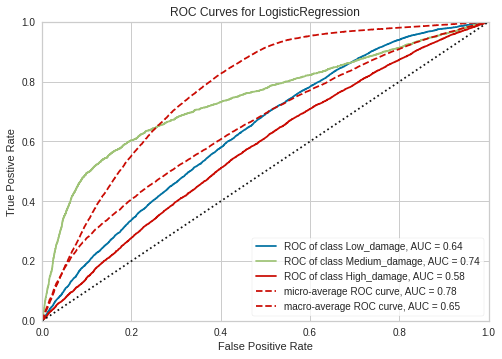

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(lr1, X_train, y_train, X_test=X_test, y_test=y_test, classes=["Low_damage","Medium_damage","High_damage"])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, multi_class = "multinomial", solver="newton-cg",C=1000)
lr.get_params()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_lr = lr.predict(X_test)


In [ ]:
generate_model_report(y_test, y_lr)

Accuracy =  0.5735412621545498
Precision =  0.5735412621545498
Recall =  0.5735412621545498
F1 Score =  0.5735412621545498
Cohen Kappa score=  0.054859751883745034
Hamming Loss =  0.42645873784545013
Jaccard Score =  0.4020735033814138
Matthews correlation coefficient =  0.09832077432011575
Zero one loss =  0.4264587378454502
Balanced accuracy =  0.3805972359256888


In [ ]:
y_prob = lr.predict_proba(X_test)
y_prob

array([[0.35189195, 0.08266325, 0.5654448 ],
       [0.4844873 , 0.04708491, 0.46842779],
       [0.41615609, 0.04463939, 0.53920452],
       ...,
       [0.23045889, 0.22813972, 0.54140138],
       [0.39632422, 0.03769904, 0.56597674],
       [0.39786033, 0.0630494 , 0.53909026]])

In [ ]:
lr.score(X_train,y_train)
#It meand very low bias which means underfitting.

0.5730851880276285

In [ ]:
lr.score(X_test,y_test)

0.5734721913108879

In [ ]:
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.677755 (macro),
0.654612 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.654047 (macro),
0.612470 (weighted by prevalence)


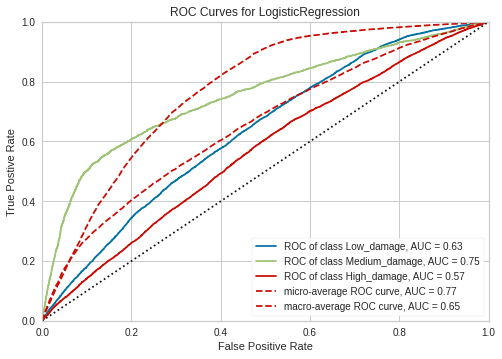

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(lr, X_train, y_train, X_test=X_test, y_test=y_test, classes=["Low_damage","Medium_damage","High_damage"])


In [ ]:
f1_score(y_test,y_lr,average = "micro")

0.5735412621545498

In [ ]:
f1_score(y_test,y_lr,average = "macro")

0.3420233193443914

In [ ]:
f1_score(y_test,y_lr,average = "weighted")

0.46119811235559044

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr, labels=['Low_Damage', 'Medium_Damage', 'High_Damage']))

               precision    recall  f1-score   support

   Low_Damage       0.50      0.14      0.21     12625
Medium_Damage       0.58      0.96      0.72     74156
  High_Damage       0.50      0.05      0.09     43520

     accuracy                           0.57    130301
    macro avg       0.53      0.38      0.34    130301
 weighted avg       0.55      0.57      0.46    130301



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_lr, labels=['Low_Damage', 'Medium_Damage', 'High_Damage'])


array([[ 1723, 10700,   202],
       [ 1381, 70822,  1953],
       [  342, 40990,  2188]])




# > **KNN**






In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25, weights = 'distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
y_knn = knn.predict(X_test)

KeyboardInterrupt: ignored

In [ ]:
generate_model_report(y_test,y_knn)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(knn, X_train, y_train, X_test=X_test, y_test=y_test, classes=["Low_damage","Medium_damage","High_damage"])


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn, labels=['Low_Damage', 'Medium_Damage', 'High_Damage']))

In [ ]:
f1_score(y_test,y_knn,average = "micro")

In [ ]:
f1_score(y_test,y_knn,average = "macro")

In [ ]:
f1_score(y_test,y_knn,average = "weighted")

In [ ]:
y_knn_prob = knn.predict_proba(X_test)
# brier_score_loss(y_test,y_knn_prob[:,1])

In [ ]:
y_knn_prob

In [ ]:
y

In [ ]:
scoring = make_scorer(f1_score, average = 'micro')

from sklearn.model_selection import GridSearchCV
parameters={'weights':['distance','uniform'], 'n_neighbors':[3,5,7,9,12,15,20,25]}
kn = GridSearchCV(knn, parameters,scoring=scoring, cv=5)
kn.fit(X_train,y_train)
params = kn.best_params_
kn_grid = KNeighborsClassifier()
kn_grid.set_params(**params)
kn_grid.fit(X_train,y_train)
y_grid = kn_grid.predict(X_test)


In [ ]:
params

In [ ]:
generate_model_report(y_test,y_grid)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(kn_grid, X_train, y_train, X_test=X_test, y_test=y_test, classes=["Low_damage","Medium_damage","High_damage"])


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_grid, labels=['Low_Damage', 'Medium_Damage', 'High_Damage']))

               precision    recall  f1-score   support

   Low_Damage       0.58      0.32      0.42     12625
Medium_Damage       0.61      0.78      0.68     74156
  High_Damage       0.48      0.32      0.38     43520

     accuracy                           0.58    130301
    macro avg       0.56      0.47      0.49    130301
 weighted avg       0.56      0.58      0.56    130301





# > **Naive Bayes**





In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_nb = nb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_nb, labels=['Low_Damage', 'Medium_Damage', 'High_Damage']))

               precision    recall  f1-score   support

   Low_Damage       0.38      0.51      0.44     12625
Medium_Damage       0.67      0.08      0.14     74156
  High_Damage       0.39      0.93      0.55     43520

     accuracy                           0.41    130301
    macro avg       0.48      0.51      0.37    130301
 weighted avg       0.55      0.41      0.31    130301



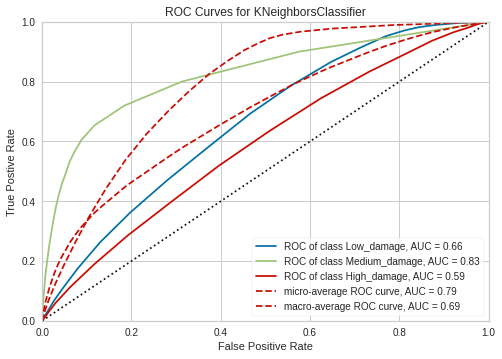

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(kn_grid, X_train, y_train, X_test=X_test, y_test=y_test, classes=["Low_damage","Medium_damage","High_damage"])


In [ ]:
generate_model_report(y_test,y_nb)

Accuracy =  0.40506212538660485
Precision =  0.40506212538660485
Recall =  0.40506212538660485
F1 Score =  0.4050621253866048
Cohen Kappa score=  0.1260720229548492
Hamming Loss =  0.5949378746133951
Jaccard Score =  0.25396733743299554
Matthews correlation coefficient =  0.20021494326095735
Zero one loss =  0.5949378746133951
Balanced accuracy =  0.5061358962103849




#> **SVM**



In [ ]:
from sklearn import svm
svm = svm.SVC(C=1000)

In [ ]:
svm.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>

In [ ]:
svm.fit(X_train,y_train)
y_svm = svm.predict(X_test)

In [ ]:
svm.score(X_train,y_train)

In [ ]:
svm.score(X_test,y_test)

In [ ]:
generate_model_report(y_test,y_svm)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(svm, X_train, y_train, X_test=X_test, y_test=y_test, classes=["Low_damage","Medium_damage","High_damage"])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


NameError: ignored

In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters={"C":[1,10,100,500,1000],'gamma':['auto','scale']}
# sv = GridSearchCV(svm, parameters,scoring= 'f1',
#  cv=5)
# sv.fit(X_train,y_train)
# params = sv.best_params_
# svm2 = svm.SVC()
# svm2.set_params(**params)
# svm2.fit(X_train,y_train)
# y_grid = svm2.predict(X_test)

In [ ]:
# generate_model_report(y_test,y_grid)

NameError: ignored

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# roc_auc(svm2, X_train, y_train, X_test=X_test, y_test=y_test, classes=["Low_damage","Medium_damage","High_damage"])




# > **Decision Tree**




In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(class_weight="balanced")

In [ ]:
tree1.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>

In [ ]:
tree1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_t1 = tree1.predict(X_test)

In [ ]:
tree1.score(X_train,y_train)

0.823783576362241

In [ ]:
tree1.score(X_test,y_test)
#POOR Performance

0.5044397203398285

In [ ]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_t1) 
cm

array([[21878,  2935, 18707],
       [ 1948,  5139,  5538],
       [26705,  8739, 38712]])

In [ ]:
generate_model_report(y_test,y_t1)

Accuracy =  0.5044397203398285
Precision =  0.5044397203398285
Recall =  0.5044397203398285
F1 Score =  0.5044397203398285
Cohen Kappa score=  0.14997890377165846
Hamming Loss =  0.49556027966017147
Jaccard Score =  0.3372914667501398
Matthews correlation coefficient =  0.15156038658546653
Zero one loss =  0.49556027966017147
Balanced accuracy =  0.4772651772362903


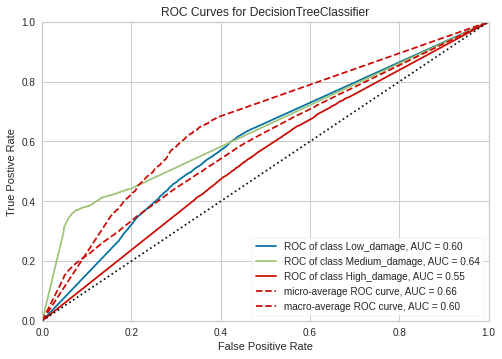

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(tree1, X_train, y_train, X_test=X_test, y_test=y_test, classes=["Low_damage","Medium_damage","High_damage"])

In [ ]:
#class weight balanced didn't improve it!

In [ ]:
from sklearn.model_selection import permutation_test_score
score, permutation_scores, pvalue = permutation_test_score(
    tree1, X_train, y_train, scoring="accuracy", cv=5, n_permutations=20, n_jobs=1)
print("Classification score %s (pvalue : %s)" % (score, pvalue))


In [ ]:
scoring = make_scorer(f1_score, average = 'micro')


In [ ]:
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    tree1, cv=10, scoring=scoring,verbose = 0
)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()



# > **Random Forest**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(oob_score = True,n_estimators=250)

In [ ]:
clf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)>

In [ ]:
clf.fit(X_train,y_train)
y_clf = clf.predict(X_test)


In [ ]:
clf.score(X_test,y_test)

0.5854399778974997

In [ ]:
clf.score(X_train,y_train)

0.8348938347403428

In [ ]:
generate_model_report(y_test,y_clf)

Accuracy =  0.5854399778974997
Precision =  0.5854399778974997
Recall =  0.5854399778974997
F1 Score =  0.5854399778974997
Cohen Kappa score=  0.2001095991310582
Hamming Loss =  0.41456002210250037
Jaccard Score =  0.4138671875
Matthews correlation coefficient =  0.20635310359576614
Zero one loss =  0.4145600221025003
Balanced accuracy =  0.4914613358408039


In [ ]:
clf.oob_score_

0.5806088513686365

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


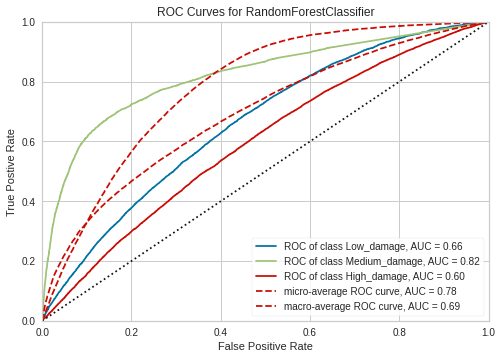

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(clf, X_train, y_train, X_test=X_test, y_test=y_test, classes=["Low_damage","Medium_damage","High_damage"])

In [ ]:
# from sklearn.model_selection import permutation_test_score
# score, permutation_scores, pvalue = permutation_test_score(
#     clf, X_train, y_train, scoring="accuracy", cv=2, n_permutations=10, n_jobs=1)
# print("Classification score %s (pvalue : %s)" % (score, pvalue))

In [ ]:
scoring = make_scorer(f1_score,average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AttributeError: ignored

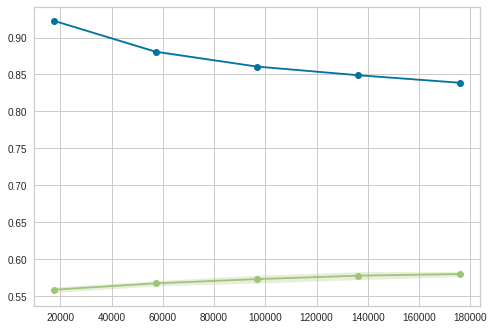

In [ ]:
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve( clf, cv=10, scoring=scoring,verbose = 0 ) 
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer 
visualizer.show()


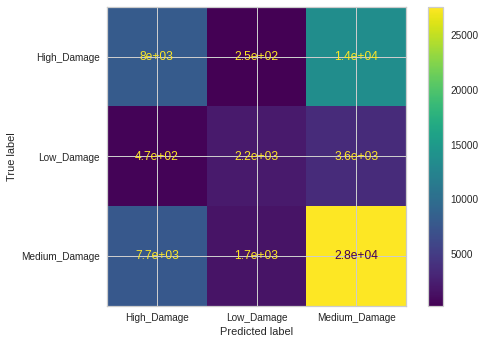

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_clf, labels=['Low_Damage', 'Medium_Damage', 'High_Damage']))

               precision    recall  f1-score   support

   Low_Damage       0.53      0.36      0.43      6246
Medium_Damage       0.62      0.75      0.68     36968
  High_Damage       0.50      0.36      0.42     21937

     accuracy                           0.58     65151
    macro avg       0.55      0.49      0.51     65151
 weighted avg       0.57      0.58      0.57     65151



In [ ]:
y

0           High_Damage
1         Medium_Damage
2           High_Damage
3         Medium_Damage
4           High_Damage
              ...      
260596    Medium_Damage
260597      High_Damage
260598      High_Damage
260599    Medium_Damage
260600      High_Damage
Name: damage_grade, Length: 260601, dtype: object



# > **XGBOOST CLASSIFIER**



In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method = 'hist', min_child_weight = 3, n_estimators =250 , learning_rate=0.05,max_depth=15, reg_lambda=0, class_weight="balanced",num_parallel_tree=3,grow_policy = "lossguide" )

In [ ]:
# parameters = {'learning_rate': [0.05,0.1,0.3], #so called `eta` value
#               'max_depth': [10,15,20],
#               'min_child_weight': [1,5],              
          
#               'n_estimators': [150,200,250,300],
#                }

In [ ]:
# from sklearn.utils import class_weight
# class_weights = list(class_weight.compute_class_weight('balanced',
#                                              np.unique(y_train),
#                                              y_train))

# w_array = np.ones(y_train.shape[0], dtype = 'float')
# for i, val in enumerate(y_train):
#     w_array[i] = class_weights[val-1]

# xgb.fit(X_train, y_train, sample_weight=w_array)


# sample_weight=compute_sample_weight("balanced", y)

In [ ]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, grow_policy='lossguide', learning_rate=0.05,
              max_delta_step=0, max_depth=15, min_child_weight=3, missing=None,
              n_estimators=250, n_jobs=1, nthread=None, num_parallel_tree=3,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, tree_method='hist', verbosity=1)

In [ ]:
y_xgb = xgb.predict(X_test)

In [ ]:
xgb.score(X_test,y_test)

0.6112198303979126

In [ ]:
xgb.score(X_train,y_train)

0.7204826468832608

In [ ]:
generate_model_report(y_test,y_xgb)

Accuracy =  0.6112198303979126
Precision =  0.6112198303979126
Recall =  0.6112198303979126
F1 Score =  0.6112198303979126
Cohen Kappa score=  0.22283132913134696
Hamming Loss =  0.3887801696020874
Jaccard Score =  0.4401127289807421
Matthews correlation coefficient =  0.24282738732519954
Zero one loss =  0.3887801696020874
Balanced accuracy =  0.49823781956443486


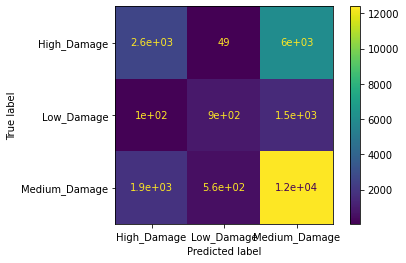

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

In [ ]:
f1_score(y_test,y_xgb,average="micro")

0.6112198303979126

In [ ]:
df3.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_ans = xgb.predict(test)

In [ ]:
df5 = pd.DataFrame()
df5['building_id'] = df3['building_id']


In [ ]:
df5['damage_grade'] = y_ans
df5

,building_id,damage_grade
0,300051,High_Damage
1,99355,Medium_Damage
2,890251,Medium_Damage
3,745817,Medium_Damage
4,421793,High_Damage
...,...,...
86863,310028,High_Damage
86864,663567,Medium_Damage
86865,1049160,Medium_Damage
86866,442785,Medium_Damage


In [ ]:
df5[df5['damage_grade']=="Low_Damage"]=1
df5[df5['damage_grade']=="Medium_Damage"]=2
df5[df5['damage_grade']=="High_Damage"]=3
df5['building_id'] = df3['building_id']

In [ ]:
df5

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,2
4,421793,3
...,...,...
86863,310028,3
86864,663567,2
86865,1049160,2
86866,442785,2


In [ ]:
df5.index = df5['building_id']

In [ ]:
df5

,building_id,damage_grade
building_id,,
300051,300051,3
99355,99355,2
890251,890251,2
745817,745817,2
421793,421793,3
...,...,...
310028,310028,3
663567,663567,2
1049160,1049160,2


In [ ]:
df5 = df5.drop(columns = 'building_id')

In [ ]:
df5

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,2
421793,3
...,...
310028,3
663567,2
1049160,2


In [ ]:
df5.to_csv("submit2.csv")